# Buy Hold Sell 

In this activity, you’ll write a trading algorithm that buys 100 shares of AMD stock on the days when the price decreases and that sells the accumulated shares on the last day of the trading period.

## Instructions:

1. Using the data that the starter notebook supplies, run the code cells that import the required libraries, and then create a Pandas DataFrame named `amd_df`.

2. Use the Pandas `bdate_range` function to assign dates to the values in the DataFrame. Set the dates as the DataFrame index. Use `2019-09-30` for the starting date.

3. Visualize the price movement of the DataFrame by using the `plot` function.

4. Write an algorithm that loops through each index and row of the DataFrame by using the Pandas `iterrows` function. Make sure that the algorithm checks the following conditions and executes the strategy for each one:

    * If `previous_price = 0`, use the `loc` function to set the “trade_type” column for the current index to “buy”.

    * Otherwise, if the price of the current day is less than that of the previous day, set the “trade_type” column for the current index to “buy”.

    * Otherwise, if the price of the current day is greater than that of the previous day, set the “trade_type” column for the current index to “hold”.

    * Additionally, if the price of the current day is equal to that of the previous day, also set the “trade_type” column of the current index to “hold”.
    
    * If the current index is equal to the last index of the DataFrame, set the “trade_type” column for the current index to “sell”. (Use the `index` function to check the current index.)

5. Run the algorithm. Then review the resulting DataFrame to confirm that given the closing prices, the “trade_type” column populated as expected.

6. Change the algorithm to include the cost and proceeds metrics for buys of 100 shares. Make sure that the algorithm checks the following conditions and executes the strategy for each one:

    * If `previous_price = 0`, use the `loc` function to set the “trade_type” column for the current index to “buy”. Set the “cost/proceeds” column to the current share price multiplied by a `share_size` value of 100. Make sure to take the negative value of the expression so that the cost reflects money leaving an account. Finally, make sure to add the bought shares to an `accumulated_shares` variable.

    * Otherwise, if the price of the current day is less than that of the previous day, set the “trade_type” column of the current index to “buy”. Set the “cost/proceeds” column to the current share price multiplied by a `share_size` value of 100. Make sure to take the negative value of the expression so that the cost reflects money leaving an account. Finally, make sure to add the bought shares to an `accumulated_shares` variable. 
    
    * You will not be modifying the algorithm for instances where the current day’s price is greater than the previous day’s price or when it is equal to the previous day’s price. 

    * If the current index is equal to the last index of the DataFrame, set the “trade_type” column for the current index to “sell”. (Use the `index` function to check the current index.) In this case, also set the “cost/proceeds” column to the total number in the `accumulated_shares` variable multiplied by the price of the last day.

7. Run the updated algorithm. Then review the “cost/proceeds” column in the resulting DataFrame to confirm two results. First, the dates that have a “trade_type” of “buy” should have cost values in this column. Second, the final date should have a proceeds value in this column.

8. Calculate the total profit or loss for the trading algorithm by summing the values in the "cost/proceeds" column. Print the value of the total profit or loss from the trades.

    > **Hint** Use the `sum` and `round` functions to sum the values in the “cost/proceeds” column.

9. Calculate the ROI for the trades. To do so, first calculate the invested capital (the total cost of all the buys). Then divide the total profit or loss by the cost of all the buys to determine the ROI. Finally, print the value of the ROI.

## References:

[Pandas `bdate_range` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.bdate_range.html)

[Pandas `iterrows` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html)


## Step 1: Using the data that the starter notebook supplies, run the code cells that import the required libraries, and then create a Pandas DataFrame named `amd_df`.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

In [2]:
# Create the Pandas DataFrame using the price information supplied
amd_df = pd.DataFrame(
    {"close": [28.99, 28.76, 28.31, 28.68, 29.01, 28.93, 28.23, 28.46, 28.38, 29.75,]}
)

# Review the DataFrame
amd_df

,close
0,28.99
1,28.76
2,28.31
3,28.68
4,29.01
5,28.93
6,28.23
7,28.46
8,28.38
9,29.75


## Step 2: Use the Pandas `bdate_range` function to assign dates to the values in the DataFrame. Set the dates as the DataFrame index. Use `2019-09-30` for the starting date.

In [3]:
# Set the index as datetime objects starting from 2019-09-09 and onwards (but only business days)
amd_df.index =  pd.bdate_range(start='2019-09-09', periods=10)

# Review the DataFrame
amd_df



,close
2019-09-09,28.99
2019-09-10,28.76
2019-09-11,28.31
2019-09-12,28.68
2019-09-13,29.01
2019-09-16,28.93
2019-09-17,28.23
2019-09-18,28.46
2019-09-19,28.38
2019-09-20,29.75


## Step 3: Visualize the price movement of the DataFrame by using the `plot` function.

<AxesSubplot:>

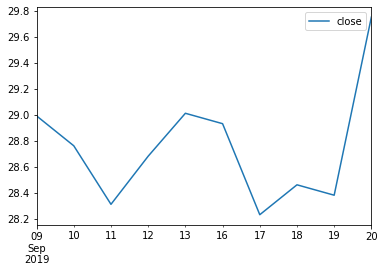

In [4]:
# Visualize the DataFrame using the plot function 
amd_df.plot()



## Step 4: Write an algorithm that loops through each index and row of the DataFrame by using the Pandas `iterrows` function.

In [5]:
# Initialize trade_type column for buys and sells
amd_df['trade_type'] =  np.nan

# Initialize variable to hold the previous_price
previous_price =  0

# Loop through the Pandas DataFrame and initiate a trade at each iteration 
for index, row in amd_df.iterrows():
    
    # buy if the previous price is 0, in other words, buy on the first day
    if previous_price == 0:
        amd_df.loc[index, 'trade_type'] = 'buy'

    # buy if the current day price is less than the previous day price
    elif row["close"] < previous_price:
        amd_df.loc[index, 'trade_type'] = 'buy'

    # sell if the current day price is greater than the previous day price
    elif row["close"] > previous_price:
        amd_df.loc[index, 'trade_type'] = 'sell'

    # else hold if the current day price is equal to the previous day price
    else:
        amd_df.loc[index, 'trade_type'] = 'hold'
    
    # set the previous_price variable to the close price of the current row
    previous_price =  row["close"]

    # if the index is the last index of the Dataframe, set the trade_type to sell
    if index == amd_df.index[-1]:
        amd_df.loc[index, 'trade_type'] = 'sell'
        


## Step 5: Run the algorithm. Then review the resulting DataFrame to confirm that given the closing prices, the “trade_type” column populated as expected.

In [6]:
# Run the algorithm and review the DataFrame
amd_df


,close,trade_type
2019-09-09,28.99,buy
2019-09-10,28.76,buy
2019-09-11,28.31,buy
2019-09-12,28.68,sell
2019-09-13,29.01,sell
2019-09-16,28.93,buy
2019-09-17,28.23,buy
2019-09-18,28.46,sell
2019-09-19,28.38,buy
2019-09-20,29.75,sell


## Step 6: Change the algorithm by modifying the loop to include the cost and proceeds metrics for buys of 100 shares. 

In [11]:
# Initialize trade_type column for buys and sells
amd_df['trade_type'] = np.nan

# Initialize `profit/loss` column for recording trade metrics
amd_df["cost/proceeds"] =  np.nan

# Initialize share size and accumulated shares
share_size =  100
accumulated_shares =  0

# Initialize variable to hold previous price
previous_price = 0

# Loop through the Pandas DataFrame and initiate a trade at each iteration 
for index, row in amd_df.iterrows():

    # buy if the previous price is 0, in other words, buy on the first day
    # set the cost/proceeds column equal to the negative value of the row close price
    # multiplied by the share_size
    if previous_price == 0:
        amd_df.loc[index, 'trade_type'] = 'buy'
        amd_df.loc[index, 'cost/proceeds'] = -row['close'] * share_size

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size

    # buy if the current day price is less than the previous day price
    # set the cost/proceeds column equal to the negative value of the row close price
    # multiplied by the share_size
    elif row["close"] < previous_price:
        amd_df.loc[index, 'trade_type'] = 'buy'
        amd_df.loc[index, 'cost/proceeds'] = -row['close'] * share_size

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size
        
    # hold if the current day price is greater than the previous day price
    elif row["close"] > previous_price:
        amd_df.loc[index, 'trade_type'] = 'hold'
        

    # also hold if the current day price is equal to the previous day price
    else:
        amd_df.loc[index, 'trade_type'] = 'hold'
        
    
    # set the previous_price variable to the close price of the current row
    previous_price = row["close"]
    
    # if the index is the last index of the Dataframe, sell
    # set the cost/proceeds column equal to the row close price multiplied 
    # by the accumulated_shares
    if index == amd_df.index[-1]:
        amd_df.loc[index, 'trade_type'] = 'sell'
        amd_df.loc[index, 'cost/proceeds'] = row['close'] * accumulated_shares
        


## Step 7: Run the updated algorithm. Then review the “cost/proceeds” column in the resulting DataFrame to confirm two results. First, the dates that have a “trade_type” of “buy” should have cost values in this column. Second, the final date should have a proceeds value in this column.

In [12]:
# Run the adjusted algorithm and review the DataFrame
amd_df


,close,trade_type,cost/proceeds
2019-09-09,28.99,buy,-2899.0
2019-09-10,28.76,buy,-2876.0
2019-09-11,28.31,buy,-2831.0
2019-09-12,28.68,hold,NaN
2019-09-13,29.01,hold,NaN
2019-09-16,28.93,buy,-2893.0
2019-09-17,28.23,buy,-2823.0
2019-09-18,28.46,hold,NaN
2019-09-19,28.38,buy,-2838.0
2019-09-20,29.75,sell,17850.0


## Step 8: Calculate the total profit or loss for the trading algorithm by summing the values in the "cost/proceeds" column. Print the value of the total profit or loss from the trades.

In [13]:
# Calculate the total profit/loss for 100 share size orders
total_profit_loss =  round(amd_df['cost/proceeds'].sum(), 2)

# Print the profit/loss metrics
print(f"The total profit/loss of the trading strategy is ${total_profit_loss}.")

The total profit/loss of the trading strategy is $690.0.


## Step 9: Calculate the ROI for the trades. To do so, first calculate the invested capital (the total cost of all the buys). Then divide the total profit or loss by the cost of all the buys to determine the ROI. Finally, print the value of the ROI.

In [17]:
# Initialize the variable to hold the value of the invested capital
invested_capital = 0 

# Calculate the invested capital by adding the cost of all buy trades
for index, row in amd_df.iterrows():
    if row["trade_type"] == "buy":
        invested_capital =  invested_capital + row["cost/proceeds"]
        
        
# Calculate the return on investment (ROI)
roi =  round((total_profit_loss / -(invested_capital)) * 100, 2)
         
# Print the ROI
print(f"The trading algorithm resulted in a return on investment of {roi}%")

The trading algorithm resulted in a return on investment of 4.02%
